In [ ]:
!pip install geopandas

In [ ]:
!pip install geoplot

In [ ]:
import geopandas as gpd
import geoplot as gplt

geoData = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson')

# Make sure the "id" column is an integer
geoData.id = geoData.id.astype(str).astype(int)

# Remove Alaska, Hawaii and Puerto Rico.
stateToRemove = ['02', '15', '72']
geoData = geoData[~geoData.STATE.isin(stateToRemove)]

In [ ]:
geoData.columns

Index(['id', 'GEO_ID', 'STATE', 'COUNTY', 'NAME', 'LSAD', 'CENSUSAREA',
       'geometry'],
      dtype='object')

In [ ]:
import pandas as pd
df = pd.read_csv (r'https://data.chhs.ca.gov/dataset/f243090b-4c05-4c61-b614-7cb49b86b21d/resource/e6828e3c-bf54-4991-865b-b4cc11719b8d/download/cdph_ssi_adult_odp_2020h1.csv')
df=df.dropna()
counties=df.groupby(['County'])[['Procedure_Count','Infections_Reported','Infections_Predicted']].sum()
counties['infection_ratio']=counties['Infections_Reported']/counties['Procedure_Count']

In [ ]:
df['Operative_Procedure'].unique()

array(['All procedures', 'Appendix surgery',
       'Bile duct, liver or pancreatic surgery', 'Cesarean section',
       'Colon surgery', 'Exploratory abdominal surgery (laparotomy)',
       'Gallbladder surgery', 'Gastric surgery', 'Hip prosthesis',
       'Hysterectomy, abdominal', 'Hysterectomy, vaginal',
       'Kidney surgery', 'Knee prosthesis', 'Open reduction of fracture',
       'Ovarian surgery', 'Rectal surgery', 'Small bowel surgery',
       'Thoracic surgery', 'Abdominal aortic aneurysm repair',
       'Cardiac surgery', 'Coronary bypass,chest and donor incisions',
       'Coronary bypass,chest incision only', 'Kidney transplant',
       'Laminectomy', 'Pacemaker surgery', 'Spinal fusion',
       'Spleen surgery', 'Heart transplant', 'Liver transplant'],
      dtype=object)

In [ ]:
facilities = df.groupby(['Facility_Name'])[['Procedure_Count','Infections_Reported','Infections_Predicted']].sum()

In [ ]:
facilities.head()

,Procedure_Count,Infections_Reported,Infections_Predicted
Facility_Name,,,
AHMC Anaheim Regional Medical Center,1064,2,4.64
AHMC Seton Medical Center,394,2,2.16
Adventist Health Clearlake,138,0,0.64
Adventist Health Mendocino Coast,72,0,0.49
Adventist Health Simi Valley,524,0,2.60


In [ ]:
fullData = geoData.merge(counties, left_on=['NAME'], right_on=['County'])

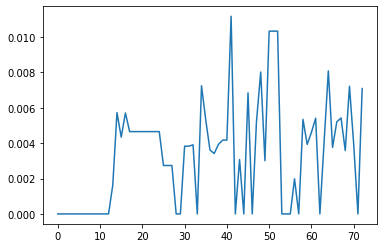

In [ ]:
plt.plot(fullData['infection_ratio'])

/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


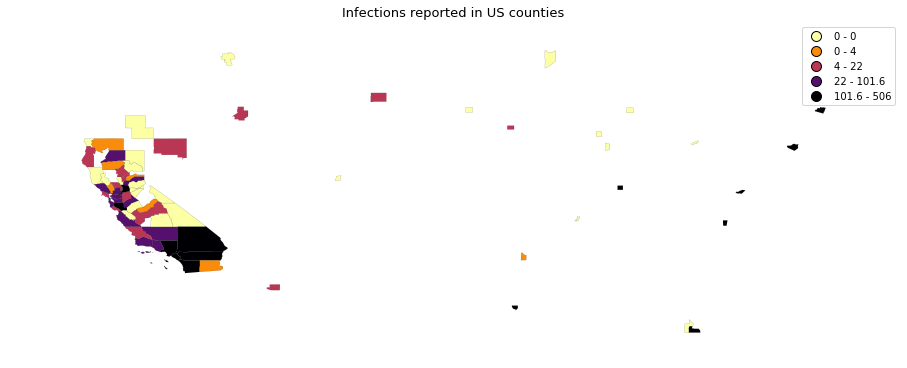

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(16, 12))

# Set up the color sheme:
import mapclassify as mc
scheme = mc.Quantiles(fullData['Infections_Reported'], k=5)

# Map
gplt.choropleth(fullData, 
    hue="Infections_Reported", 
    linewidth=0.1,
    scheme=scheme, cmap='inferno_r',
    legend=True,
    edgecolor='black',
    ax=ax
);

ax.set_title('Infections reported in US counties', fontsize=13);

/usr/local/lib/python3.7/dist-packages/mapclassify/classifiers.py:239: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/usr/local/lib/python3.7/dist-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 14
  Warn("Warning: setting k to %d" % k_q, UserWarning)
/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


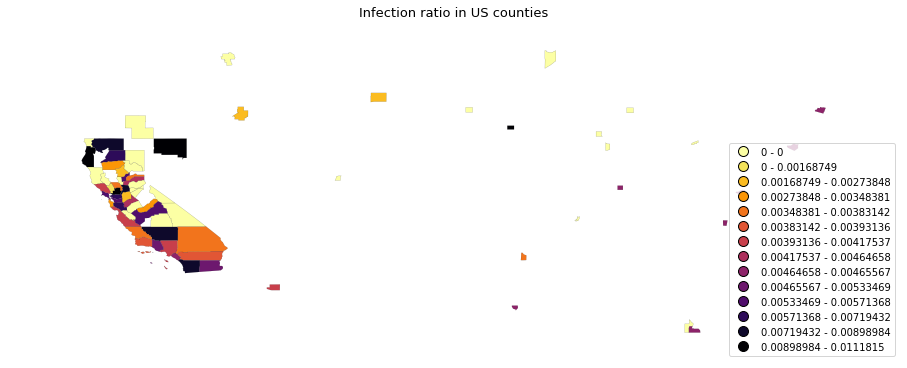

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
scheme = mc.Quantiles(fullData['infection_ratio'], k=20)

# Map
gplt.choropleth(fullData, 
    hue="infection_ratio", 
    linewidth=0.1,
    scheme=scheme, cmap='inferno_r',
    legend=True,
    edgecolor='black',
    ax=ax
);

ax.set_title('Infection ratio in US counties', fontsize=13);

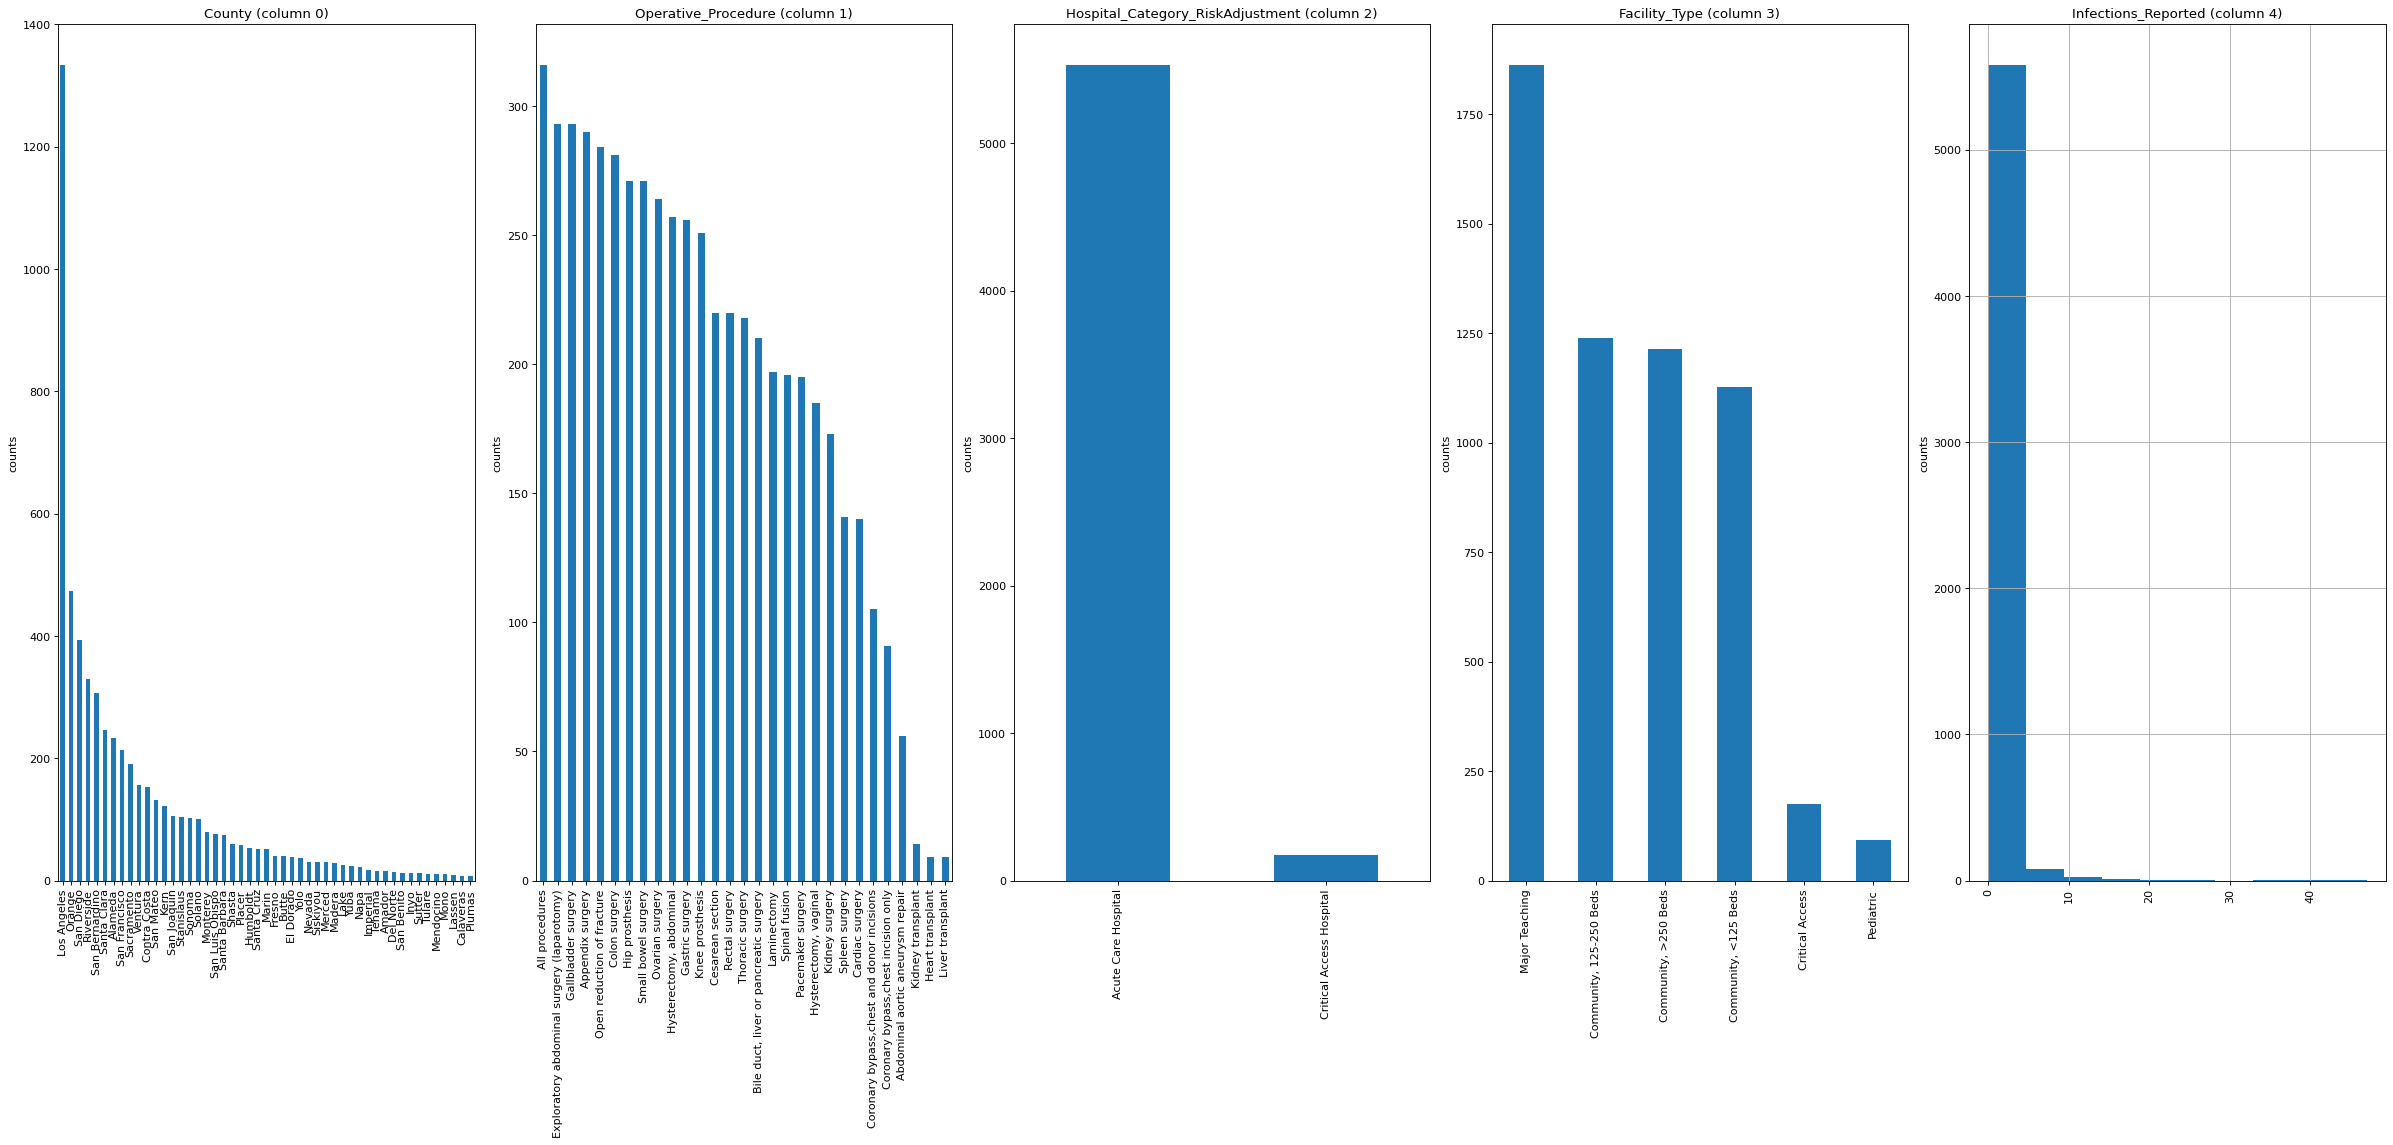

In [ ]:
import numpy as np
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
plotPerColumnDistribution(df, 10, 5)